In [1]:
import pandas as pd

data = pd.read_csv("/Users/chenjenny/Documents/Tyson/RD/ChickenFry.csv")
data.head()


,Rep,Block,Judge,Sample,Order,Overall Appearance Liking,Pretzel Breading Color Liking,Aroma Liking,Pretzel Breading Color JAR,Toasted Appearance JAR,...,Restaurants - Sonic,Restaurants - Subway,Restaurants - Popeye`s,Restaurants - Wendy`s,Restaurants - Dairy Queen,Restaurants - None of the above,Frequency (Pretzel Items),Gender,Age,Preference
0,1,1,2985,2,1,7,7,7,3,3,...,.,.,.,.,.,.,.,.,.,.
1,1,1,2985,1,2,7,7,7,3,3,...,1,0,0,1,1,0,3,2,3,2
2,1,2,3153,1,1,5,5,8,4,3,...,.,.,.,.,.,.,.,.,.,.
3,1,2,3153,2,2,6,6,8,3,3,...,1,0,1,0,1,0,3,1,1,2
4,1,2,123,2,1,9,8,9,3,3,...,.,.,.,.,.,.,.,.,.,.


In [3]:
sample = data
restaurantsData = data
sample = sample.iloc[:, 0:34]
restaurantsData = restaurantsData.iloc[:, 35:50]
restaurantsData.head()

,Restaurants - McDonald`s,Restaurants - Cane`s,Restaurants - Taco Bell,Restaurants - Hardee`s,Restaurants - KFC,Restaurants - Sonic,Restaurants - Subway,Restaurants - Popeye`s,Restaurants - Wendy`s,Restaurants - Dairy Queen,Restaurants - None of the above,Frequency (Pretzel Items),Gender,Age,Preference
0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1,1,0,0,0,0,1,0,0,1,1,0,3,2,3,2
2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,0,1,1,0,1,1,0,1,0,1,0,3,1,1,2
4,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [4]:
def normalize(df):
    result = df.copy()
    for featureName in df.columns:
        maxValue = df[featureName].max()
        minValue = df[featureName].min()
        result[featureName] = (df[featureName] - minValue) / (maxValue - minValue)
    return result

In [5]:
nSample = normalize(sample)

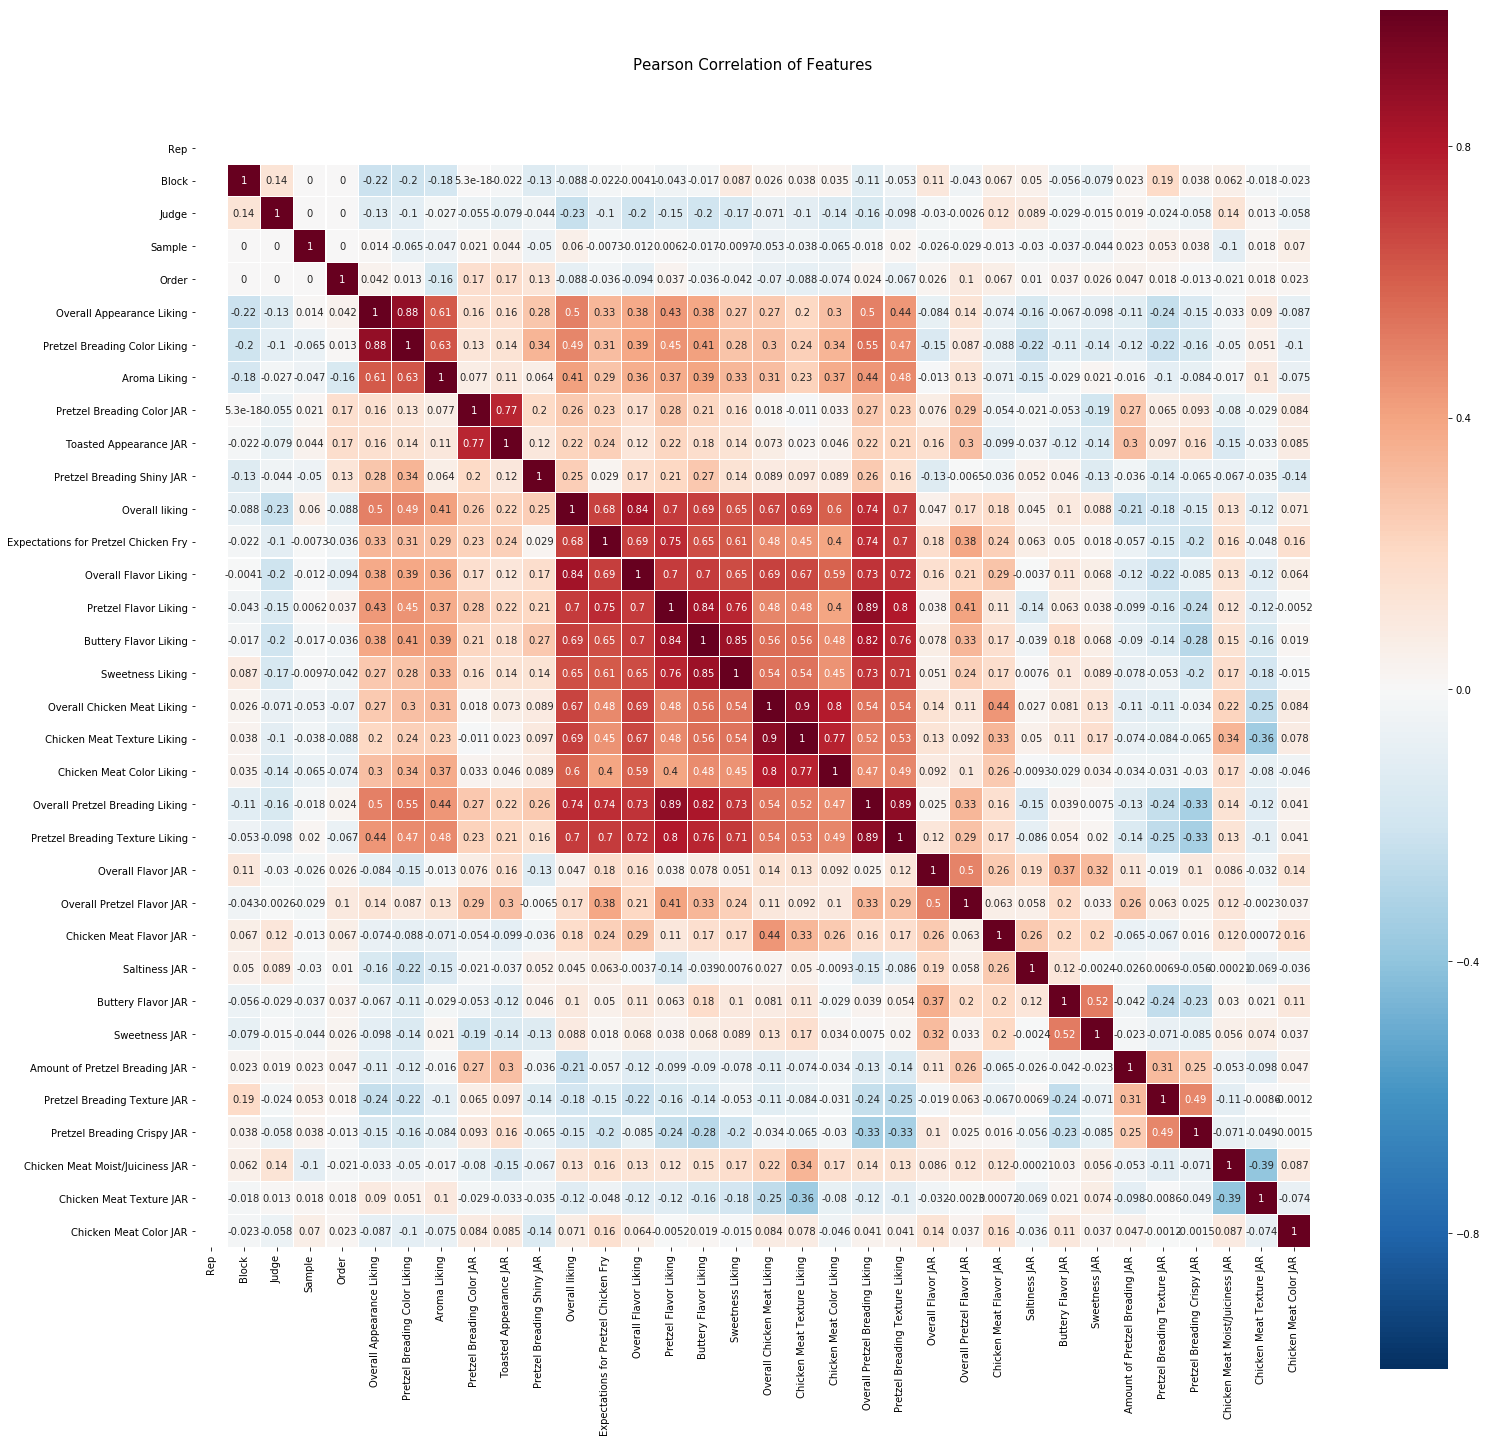

In [6]:
import seaborn.apionly as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(nSample.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

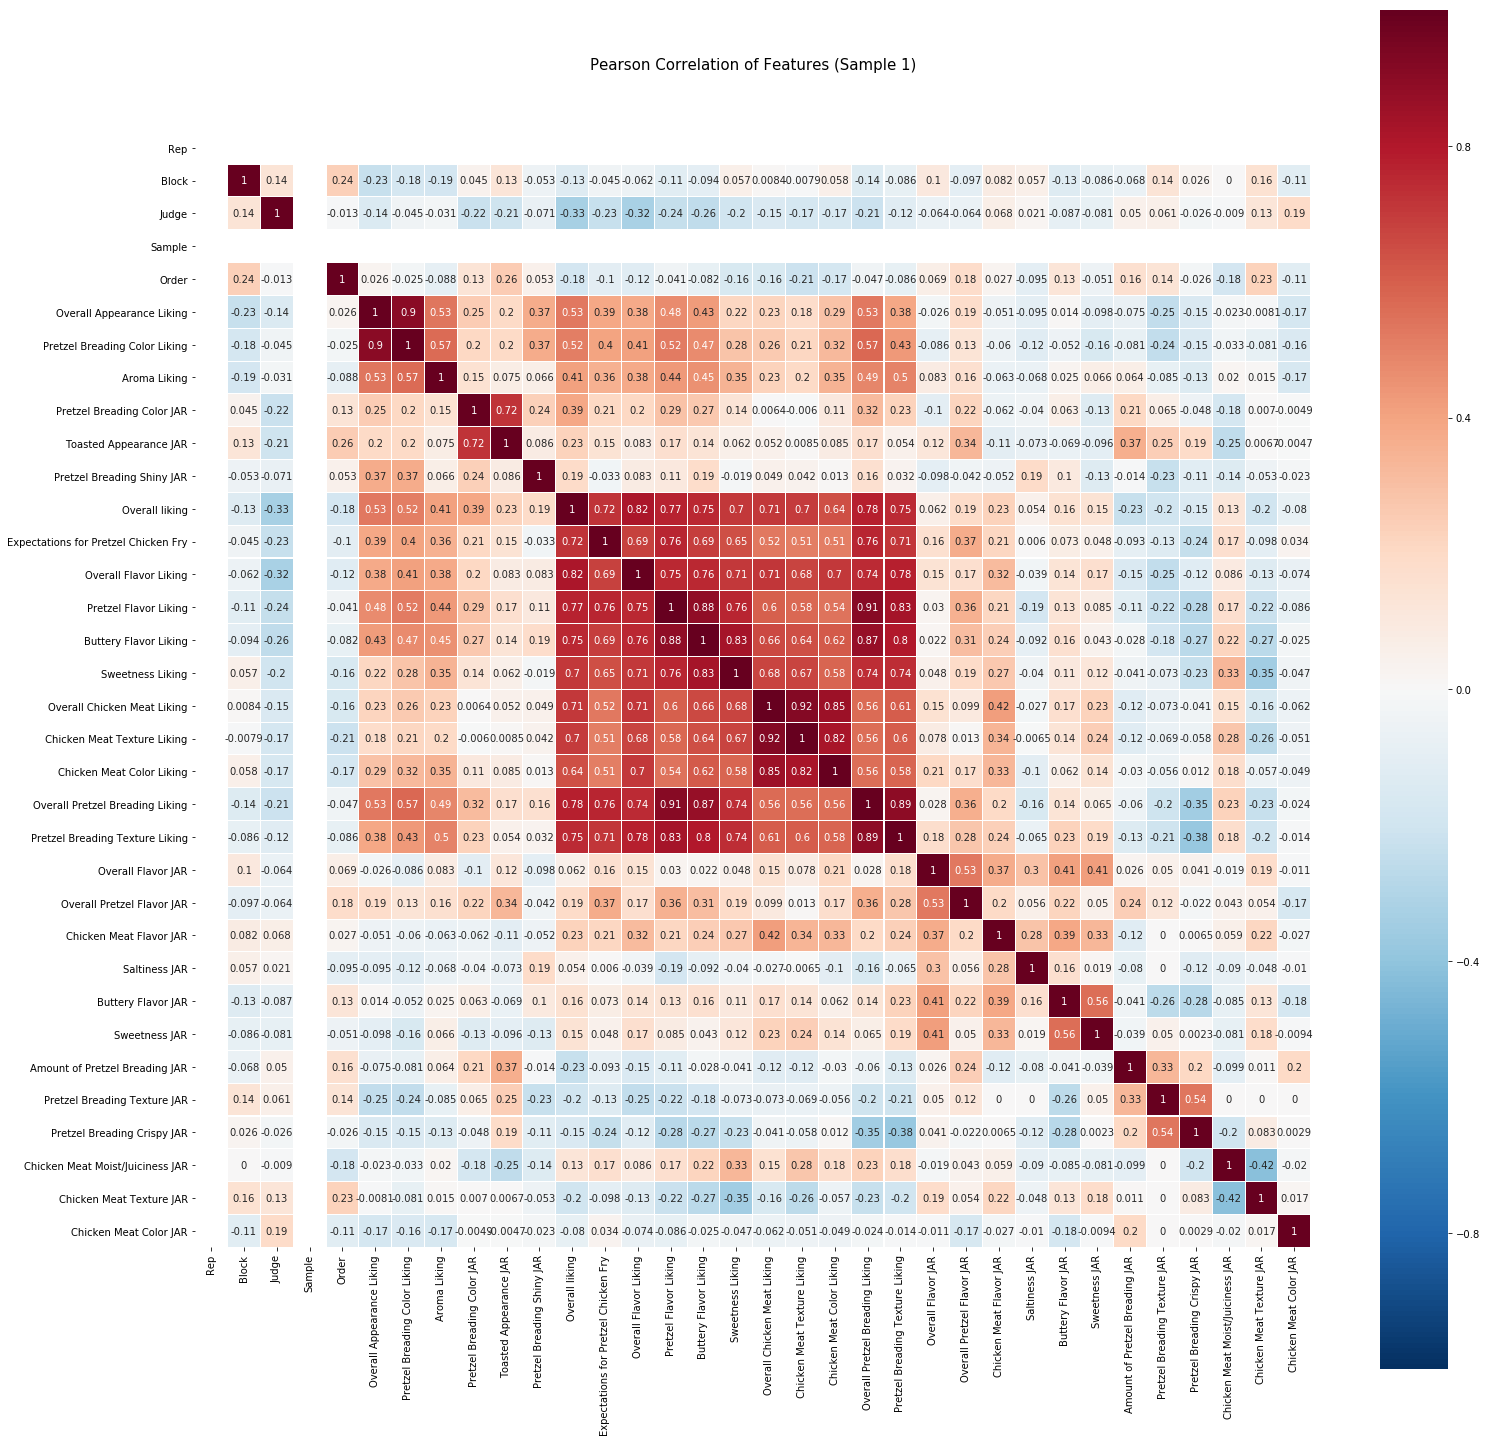

In [7]:
#Seperate the Samples
sample1 = sample[(sample['Sample'] == 1)]
sample2 = sample[(sample['Sample'] == 2)]

#Plot
plt.figure(figsize=(25,25))
plt.title('Pearson Correlation of Features (Sample 1)', y=1.05, size=15)
sns.heatmap(sample1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

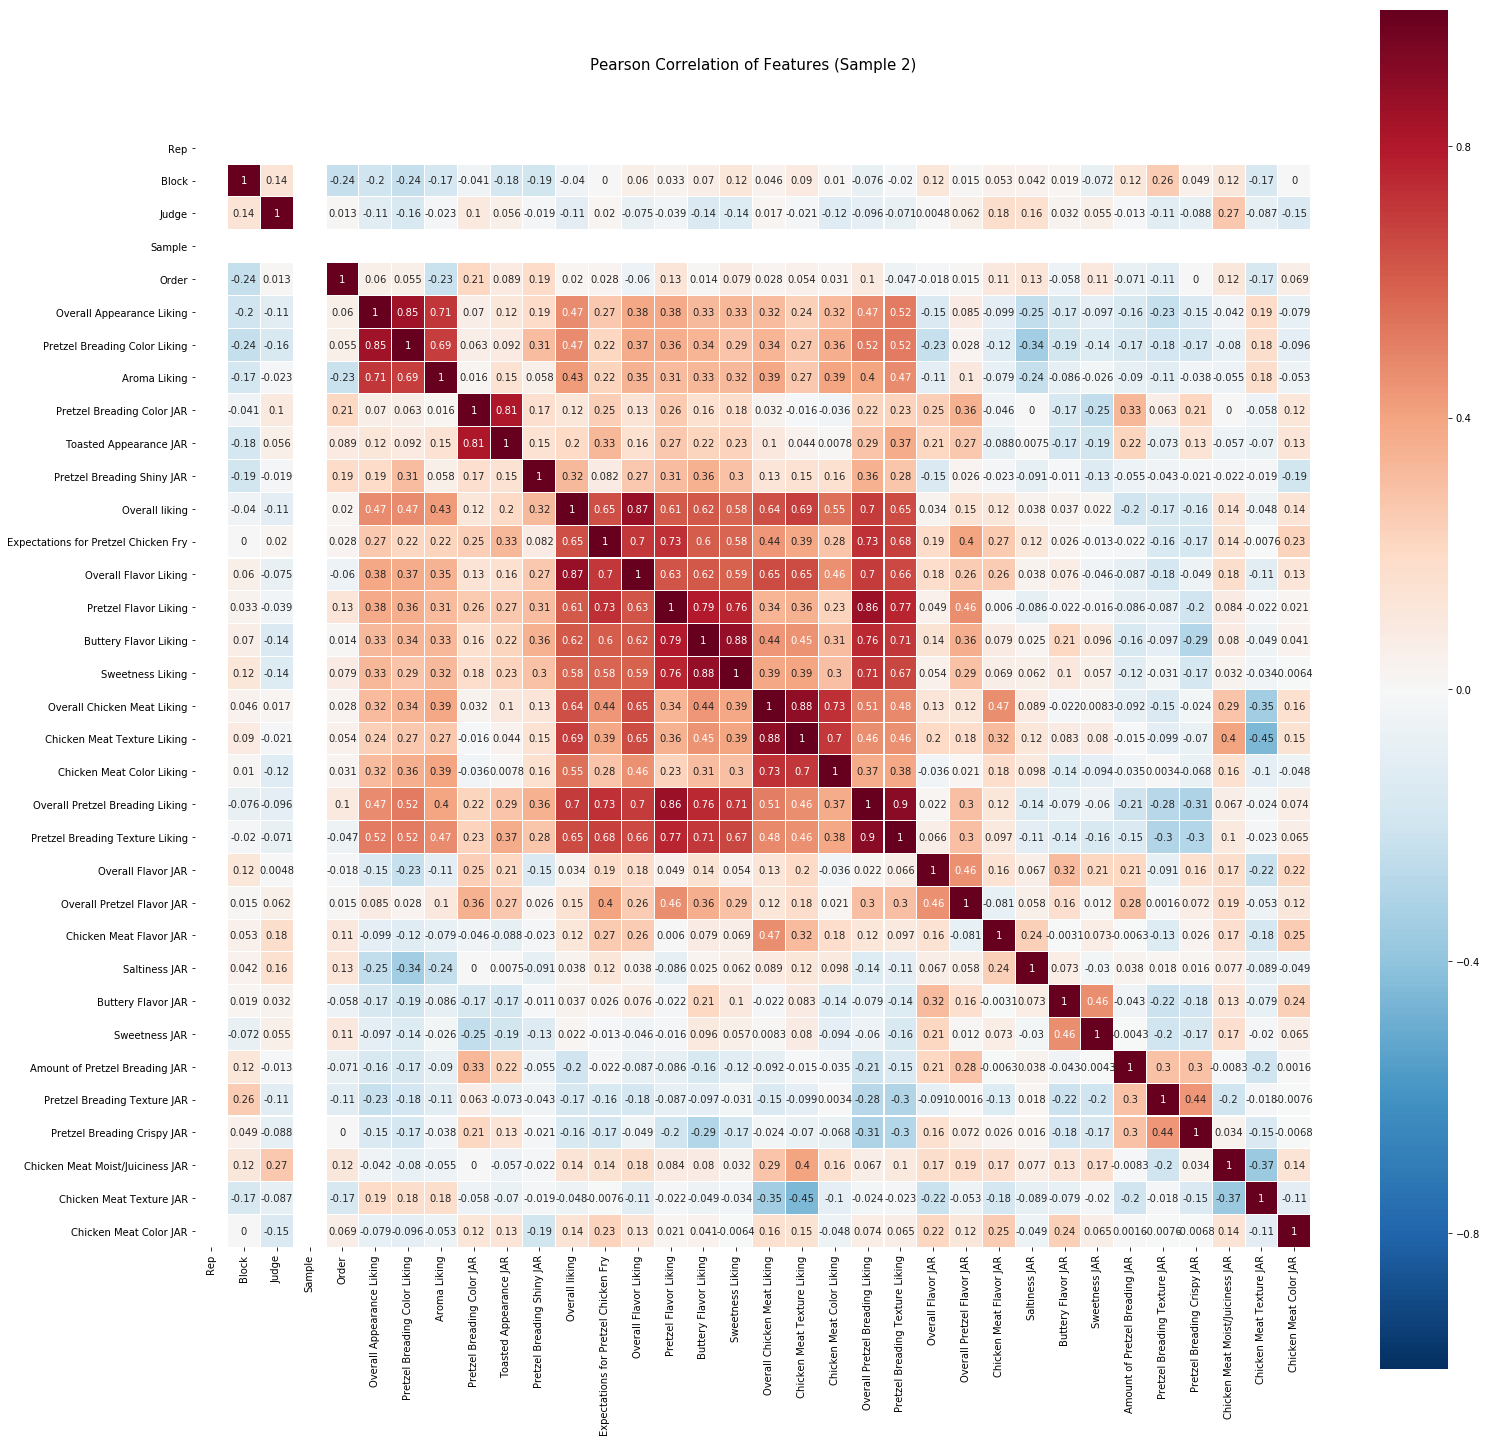

In [8]:
plt.figure(figsize=(25,25))
plt.title('Pearson Correlation of Features (Sample 2)', y=1.05, size=15)
sns.heatmap(sample2.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

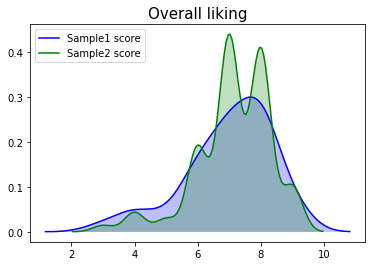

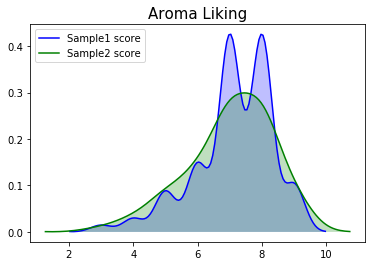

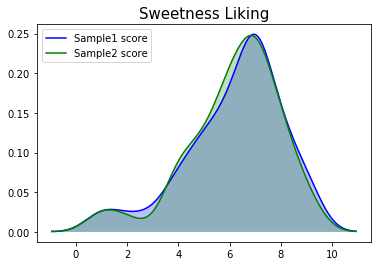

In [9]:
plt.title('Overall liking',size=15)
sns.kdeplot(sample1['Overall liking'], shade=True,color = 'Blue',label = 'Sample1 score')
sns.kdeplot(sample2['Overall liking'], shade=True,color = 'Green',label = 'Sample2 score')
plt.show()

plt.title('Aroma Liking',size=15)
sns.kdeplot(sample1['Aroma Liking'], shade=True,color = 'Blue',label = 'Sample1 score')
sns.kdeplot(sample2['Aroma Liking'], shade=True,color = 'Green',label = 'Sample2 score')
plt.show()

plt.title('Sweetness Liking',size=15)
sns.kdeplot(sample1['Sweetness Liking'], shade=True,color = 'Blue',label = 'Sample1 score')
sns.kdeplot(sample2['Sweetness Liking'], shade=True,color = 'Green',label = 'Sample2 score')
plt.show()